In [3]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier,ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import randint

Data loading and cleaning

In [40]:
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv")

y_train['RiskPerformance'] = y_train['RiskPerformance'].map({'Bad': 1, 'Good': 0})
X_train[X_train < 0] = np.nan

y_train = y_train.sort_values(by='Unnamed: 0')
X_train = X_train.sort_values(by = 'Unnamed: 0')

X_ids = X_train.iloc[:, 0]
Y_ids = y_train.iloc[:, 0] 

X_train = X_train.drop(X_train.columns[0], axis=1)
y_train = y_train.drop(y_train.columns[0], axis=1)
mask = ~X_train.isnull().all(axis=1)

X_train = X_train[mask]
    
y_train = y_train[mask]
x10_mapping = {
    0: 'off scale',
    1: '120+ days overdue',
    2: '90 days overdue',
    3: '60 days overdue',
    4: '30 days overdue',
    5: 'unknown overdue',
    6: 'unknown overdue',
    7: 'current and never overdue',
    8: 'all others',
    9: 'all others'
}

x11_mapping = {
    1: 'no such value',
    2: 'off scale',
    3: '120+ days overdue',
    4: '90 days overdue',
    5: '60 days overdue',
    6: '30 days overdue',
    7: 'unknown overdue',
    8: 'current and never overdue',
    9: 'all others'
}

X_train['X10_categorical'] = X_train['X10'].map(x10_mapping)
X_train['X11_categorical'] = X_train['X11'].map(x11_mapping)
X_train = pd.get_dummies(X_train, columns=['X10_categorical', 'X11_categorical'], prefix=['X10', 'X11'])

X_train = X_train.drop(['X10', 'X11'], axis = 1)

Dividing training set into training and test subsets on which i will evaluate model

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, test_size = 0.3)

In [ ]:
models = []
ba_train = []
ba_test = []

Every pipeline will look the same. First i impute missing data using KNNImputer later i scale data using StandardScaler, then i choose one model and define parameter grid on which i look for the parameters combination that maximize balanced accuracy

1. Logistic Regression

In [46]:
pipeline_lr = Pipeline([
    ('imputer', KNNImputer(n_neighbors=3)),
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(random_state=320768))
])
params_lr = {
    'logistic__C': [0.1, 1, 10],
    'logistic__penalty': ['l1', 'l2'],
    'logistic__solver': ['liblinear', 'saga']
}
grid_lr = GridSearchCV(pipeline_lr, param_grid=params_lr, cv=5, scoring='balanced_accuracy')

grid_lr.fit(X_train1, y_train1.RiskPerformance)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', KNNImputer(n_neighbors=3)),
                                       ('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(random_state=320768))]),
             param_grid={'logistic__C': [0.1, 1, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['liblinear', 'saga']},
             scoring='balanced_accuracy')

In [70]:
modele.append('Logistic Regression')
ba_train.append(grid_lr.score(X_train1, y_train1.RiskPerformance))
ba_test.append(grid_lr.score(X_test1, y_test1.RiskPerformance))

2. Support Vector Machine

In [48]:
pipeline_svm = Pipeline([
    ('imputer', KNNImputer(n_neighbors=3)),
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state=42))
])
params_svm = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': ['scale', 'auto']
}
grid_svm = GridSearchCV(pipeline_svm, param_grid=params_svm, cv=5, scoring='balanced_accuracy')
grid_svm.fit(X_train1, y_train1.RiskPerformance)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', KNNImputer(n_neighbors=3)),
                                       ('scaler', StandardScaler()),
                                       ('svm', SVC(random_state=42))]),
             param_grid={'svm__C': [0.1, 1, 10],
                         'svm__gamma': ['scale', 'auto'],
                         'svm__kernel': ['linear', 'rbf']},
             scoring='balanced_accuracy')

In [72]:
modele.append('SVM')
ba_train.append(grid_svm.score(X_train1, y_train1.RiskPerformance))
ba_test.append(grid_svm.score(X_test1, y_test1.RiskPerformance))

3. Naive Bayes

In [50]:
pipeline_nb = Pipeline([
    ('imputer', KNNImputer(n_neighbors=3)),
    ('scaler', StandardScaler()),
    ('nb', GaussianNB())
])
params_nb = {}
grid_nb = GridSearchCV(pipeline_nb, param_grid=params_nb, cv=5, scoring='balanced_accuracy')
grid_nb.fit(X_train1, y_train1.RiskPerformance)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', KNNImputer(n_neighbors=3)),
                                       ('scaler', StandardScaler()),
                                       ('nb', GaussianNB())]),
             param_grid={}, scoring='balanced_accuracy')

In [74]:
modele.append('Naive Bayes')
ba_train.append(grid_nb.score(X_train1, y_train1.RiskPerformance))
ba_test.append(grid_nb.score(X_test1, y_test1.RiskPerformance))

4. LDA

In [52]:
pipeline_lda = Pipeline([
    ('imputer', KNNImputer(n_neighbors=3)),
    ('scaler', StandardScaler()),
    ('lda', LinearDiscriminantAnalysis())
])
params_lda = {}
grid_lda = GridSearchCV(pipeline_lda, param_grid=params_lda, cv=5, scoring='balanced_accuracy')
grid_lda.fit(X_train1, y_train1.RiskPerformance)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', KNNImputer(n_neighbors=3)),
                                       ('scaler', StandardScaler()),
                                       ('lda', LinearDiscriminantAnalysis())]),
             param_grid={}, scoring='balanced_accuracy')

In [76]:
modele.append('LDA')
ba_train.append(grid_lda.score(X_train1, y_train1.RiskPerformance))
ba_test.append(grid_lda.score(X_test1, y_test1.RiskPerformance))

5. QDA

In [54]:
pipeline_qda = Pipeline([
    ('imputer', KNNImputer(n_neighbors=3)),
    ('scaler', StandardScaler()),
    ('qda', QuadraticDiscriminantAnalysis())
])
params_qda = {}
grid_qda = GridSearchCV(pipeline_qda, param_grid=params_qda, cv=5, scoring='balanced_accuracy')
grid_qda.fit(X_train1, y_train1.RiskPerformance)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', KNNImputer(n_neighbors=3)),
                                       ('scaler', StandardScaler()),
                                       ('qda',
                                        QuadraticDiscriminantAnalysis())]),
             param_grid={}, scoring='balanced_accuracy')

In [78]:
modele.append('QDA')
ba_train.append(grid_qda.score(X_train1, y_train1.RiskPerformance))
ba_test.append(grid_qda.score(X_test1, y_test1.RiskPerformance))

6. Binary Tree

In [56]:
pipeline_tree = Pipeline([
    ('imputer', KNNImputer(n_neighbors=3)),
    ('tree', DecisionTreeClassifier(random_state=42))
])
params_tree = {
    'tree__max_depth': [5, 10, None],
    'tree__min_samples_split': [2, 5],
    'tree__min_samples_leaf': [1, 2, 5]
}
grid_tree = GridSearchCV(pipeline_tree, param_grid=params_tree, cv=5, scoring='balanced_accuracy')
grid_tree.fit(X_train1, y_train1.RiskPerformance)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', KNNImputer(n_neighbors=3)),
                                       ('tree',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'tree__max_depth': [5, 10, None],
                         'tree__min_samples_leaf': [1, 2, 5],
                         'tree__min_samples_split': [2, 5]},
             scoring='balanced_accuracy')

In [80]:
modele.append('Tree')
ba_train.append(grid_tree.score(X_train1, y_train1.RiskPerformance))
ba_test.append(grid_tree.score(X_test1, y_test1.RiskPerformance))

7. k- Nearest Neighbors

In [58]:
pipeline_knn = Pipeline([
    ('imputer', KNNImputer(n_neighbors=3)),
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])
params_knn = {
    'knn__n_neighbors': [3, 5, 7, 10],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}
grid_knn = GridSearchCV(pipeline_knn, param_grid=params_knn, cv=5, scoring='balanced_accuracy')
grid_knn.fit(X_train1, y_train1.RiskPerformance)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', KNNImputer(n_neighbors=3)),
                                       ('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['euclidean', 'manhattan'],
                         'knn__n_neighbors': [3, 5, 7, 10],
                         'knn__weights': ['uniform', 'distance']},
             scoring='balanced_accuracy')

In [82]:
modele.append('k-Nearest Neighbors')
ba_train.append(grid_knn.score(X_train1, y_train1.RiskPerformance))
ba_test.append(grid_knn.score(X_test1, y_test1.RiskPerformance))

8. Random Forest

In [60]:
pipeline_rf = Pipeline([
    ('imputer', KNNImputer(n_neighbors = 3)),
    ('scaler', StandardScaler()),
    ('random_forest', RandomForestClassifier(random_state = 320768))])

params = {
    'random_forest__n_estimators' : [100,200,300],
    'random_forest__max_depth' : [10,20, None],
    'random_forest__min_samples_split' : [2,5],
    'random_forest__min_samples_leaf' : [1,2,5],
    'random_forest__bootstrap' : [True,False]
}

grid_pipeline_randomforest = GridSearchCV(pipeline_rf,
                                          cv = 5,
                                          param_grid  = params,
                                         scoring = 'balanced_accuracy')

grid_pipeline_randomforest.fit(X_train1, y_train1.RiskPerformance)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', KNNImputer(n_neighbors=3)),
                                       ('scaler', StandardScaler()),
                                       ('random_forest',
                                        RandomForestClassifier(random_state=320768))]),
             param_grid={'random_forest__bootstrap': [True, False],
                         'random_forest__max_depth': [10, 20, None],
                         'random_forest__min_samples_leaf': [1, 2, 5],
                         'random_forest__min_samples_split': [2, 5],
                         'random_forest__n_estimators': [100, 200, 300]},
             scoring='balanced_accuracy')

In [84]:
modele.append('RandomForest')
ba_train.append(grid_pipeline_randomforest.score(X_train1, y_train1.RiskPerformance))
ba_test.append(grid_pipeline_randomforest.score(X_test1, y_test1.RiskPerformance))

9. Extra Trees

In [62]:
pipeline_et = Pipeline([
    ('imputer', KNNImputer(n_neighbors = 3)),
    ('scaler', StandardScaler()),
    ('et', ExtraTreesClassifier(random_state = 320768))])

param_dist = {
    'et__n_estimators': randint(50, 200),
    'et__max_depth': [None, 10, 20, 30],
    'et__min_samples_split': randint(2, 10),
    'et__min_samples_leaf': randint(1, 5),
    'et__max_features': ['sqrt', 'log2', None],
}

random_search = RandomizedSearchCV(estimator=pipeline_et, 
                                   param_distributions=param_dist,
                                   n_iter=50,
                                   cv=5,
                                   scoring='balanced_accuracy',
                                   random_state=320768)
random_search.fit(X_train1, y_train1.RiskPerformance)


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('imputer',
                                              KNNImputer(n_neighbors=3)),
                                             ('scaler', StandardScaler()),
                                             ('et',
                                              ExtraTreesClassifier(random_state=320768))]),
                   n_iter=50,
                   param_distributions={'et__max_depth': [None, 10, 20, 30],
                                        'et__max_features': ['sqrt', 'log2',
                                                             None],
                                        'et__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022E3500FC50>,
                                        'et__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022E34B01C70>,
                                        'et__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022E34EF9E80>},
                   random_state=320768, scoring='balanced_accuracy')

In [86]:
modele.append('ExtraTrees')
ba_train.append(random_search.score(X_train1, y_train1.RiskPerformance))
ba_test.append(random_search.score(X_test1, y_test1.RiskPerformance))

10. Gradient Boosting

In [64]:
pipeline2 = Pipeline([
    ('imputer', KNNImputer(n_neighbors = 3)),
    ('scaler', StandardScaler()),
    ('gb', GradientBoostingClassifier())
])

params = {
    'gb__n_estimators': [50, 100, 200],          
    'gb__learning_rate': [0.01, 0.1, 0.2],        
    'gb__max_depth': [3, 5, 7],                   
    'gb__min_samples_split': [2, 5, 10],          
    'gb__min_samples_leaf': [1, 2, 4]            
}
    
grid_pipeline_gb = GridSearchCV(pipeline2,
                                          cv = 5,
                                          param_grid  = params,
                                         scoring = 'balanced_accuracy')

grid_pipeline_gb.fit(X_train1, y_train1.RiskPerformance)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', KNNImputer(n_neighbors=3)),
                                       ('scaler', StandardScaler()),
                                       ('gb', GradientBoostingClassifier())]),
             param_grid={'gb__learning_rate': [0.01, 0.1, 0.2],
                         'gb__max_depth': [3, 5, 7],
                         'gb__min_samples_leaf': [1, 2, 4],
                         'gb__min_samples_split': [2, 5, 10],
                         'gb__n_estimators': [50, 100, 200]},
             scoring='balanced_accuracy')

In [88]:
modele.append('GradientBoosting')
ba_train.append(grid_pipeline_gb.score(X_train1, y_train1.RiskPerformance))
ba_test.append(grid_pipeline_gb.score(X_test1, y_test1.RiskPerformance))

11. Stacking Classifier

In [66]:
estimators = [('rl', LogisticRegression(max_iter=500)),
              ('tree', ExtraTreesClassifier()),
              ('rf', RandomForestClassifier()),
              ('knn', KNeighborsClassifier())]

pipeline3 = Pipeline([ ('imputer', KNNImputer(n_neighbors = 3)),
                        ('scaler', StandardScaler()),
                        ('stacking', StackingClassifier(estimators=estimators, final_estimator=LogisticRegression()))
                           ])


pipeline3.fit(X_train1, y_train1.RiskPerformance)

Pipeline(steps=[('imputer', KNNImputer(n_neighbors=3)),
                ('scaler', StandardScaler()),
                ('stacking',
                 StackingClassifier(estimators=[('rl',
                                                 LogisticRegression(max_iter=500)),
                                                ('tree',
                                                 ExtraTreesClassifier()),
                                                ('rf',
                                                 RandomForestClassifier()),
                                                ('knn',
                                                 KNeighborsClassifier())],
                                    final_estimator=LogisticRegression()))])

In [90]:
modele.append('Stacking')
ba_train.append(pipeline3.score(X_train1, y_train1.RiskPerformance))
ba_test.append(pipeline3.score(X_test1, y_test1.RiskPerformance))

In [92]:
#Wyniki zapisuje w tabelce

results = pd.DataFrame({'model' : modele,
                        'ba_train' : ba_train,
                        'ba_test' : ba_test})


<Axes: xlabel='ba_train', ylabel='model'>

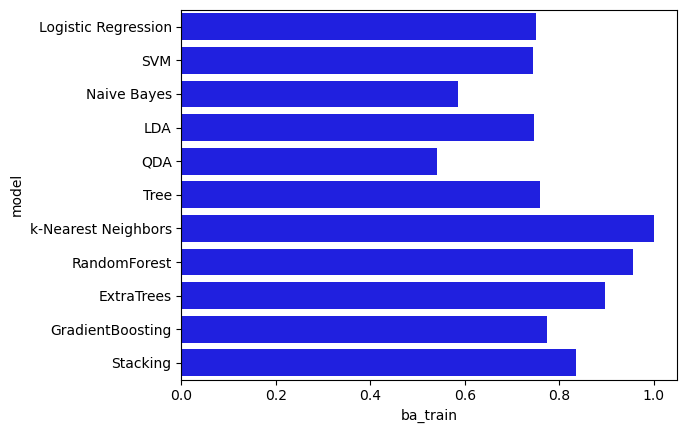

In [94]:
#Wykres przedstawiający balanced accuracy na zbiorze treningowym

sns.barplot(x = results.ba_train, y = results.model, color = "blue")

<Axes: xlabel='ba_test', ylabel='model'>

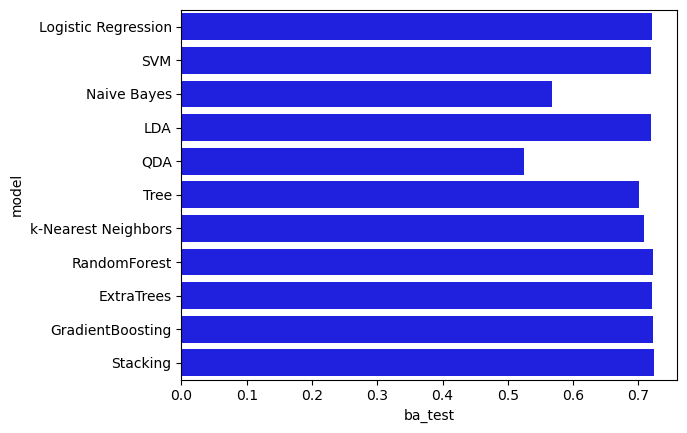

In [96]:
#Wykres przedstawiający balanced accuracy na zbiorze testowym

sns.barplot(x = results.ba_test, y = results.model, color = "blue")

In [98]:
results

,model,ba_train,ba_test
0,Logistic Regression,0.750103,0.720134
1,SVM,0.745337,0.719275
2,Naive Bayes,0.586099,0.567893
3,LDA,0.745888,0.719215
4,QDA,0.541592,0.525112
5,Tree,0.759914,0.700242
6,k-Nearest Neighbors,1.000000,0.708898
7,RandomForest,0.955382,0.722121
8,ExtraTrees,0.896745,0.721380
9,GradientBoosting,0.774824,0.722299


In [ ]:
models = {}